In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipykernel_95922/2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_excel('Actual_generation.xlsx')
data.head()

/home/valmy/Workspace/GML/.venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Data category: Actual generation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Region: DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Period: Jan 1, 2020, 12:00 AM - Dec 31, 2023, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"State: Feb 24, 2024, 10:04 PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(c) Bundesnetzagentur | SMARD.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Resolution: Quarterhour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(140265, 15)

In [3]:
# Cleaning the data by removing non-data rows and setting the appropriate header
data_cleaned = data.iloc[8:].copy()
data_cleaned.columns = data_cleaned.iloc[0]
data_cleaned = data_cleaned[1:]  # Dropping the row used as header

# Resetting the index for the cleaned data
data_cleaned.reset_index(drop=True, inplace=True)

# Checking the cleaned data
data_cleaned.head()


8,Date,Start,End,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
0,"Jan 1, 2020",12:00 AM,12:15 AM,1229.5,343.5,125.25,1476.25,0,56.25,2024,2320,496.25,1269.25,266.25,437.75
1,"Jan 1, 2020",12:15 AM,12:30 AM,1228.25,339.75,125.25,1471.5,0,55.5,2020.75,2326,487,1237.5,128,437.75
2,"Jan 1, 2020",12:30 AM,12:45 AM,1224.75,338.5,135,1527.5,0,55.5,2020.5,2334,485.5,1214.25,103,438.75
3,"Jan 1, 2020",12:45 AM,1:00 AM,1224.25,337.5,163.75,1559.5,0,55.5,2019.5,2337,493,1195.5,57.5,437.5
4,"Jan 1, 2020",1:00 AM,1:15 AM,1224,343.75,222.5,1521,0,55.5,2022.75,2352,484,1146.75,162.5,434.25


In [8]:
# checking for missing values
missing_values = data_cleaned.isnull().sum()
missing_values

8
Date                          0
Start                         0
End                           0
Biomass [MWh]                 0
Hydropower [MWh]              0
Wind offshore [MWh]           0
Wind onshore [MWh]            0
Photovoltaics [MWh]           0
Other renewable [MWh]         0
Nuclear [MWh]                 0
Lignite [MWh]                 0
Hard coal [MWh]               0
Fossil gas [MWh]              0
Hydro pumped storage [MWh]    0
Other conventional [MWh]      0
dtype: int64

In [4]:
# Converting the 'Date', 'Start', and 'End' columns to datetime objects
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%b %d, %Y')
data_cleaned['Start'] = pd.to_datetime(data_cleaned['Start'], format='%I:%M %p').dt.time
data_cleaned['End'] = pd.to_datetime(data_cleaned['End'], format='%I:%M %p').dt.time

# Converting the energy generation columns to numeric values
energy_columns = data_cleaned.columns[3:]
data_cleaned[energy_columns] = data_cleaned[energy_columns].apply(pd.to_numeric, errors='coerce')

# Rechecking data types and missing values after conversions
data_types_conv = data_cleaned.dtypes
missing_values_conv = data_cleaned.isnull().sum()



In [7]:
data_types_conv

8
Date                          datetime64[ns]
Start                                 object
End                                   object
Biomass [MWh]                        float64
Hydropower [MWh]                     float64
Wind offshore [MWh]                  float64
Wind onshore [MWh]                   float64
Photovoltaics [MWh]                  float64
Other renewable [MWh]                float64
Nuclear [MWh]                        float64
Lignite [MWh]                        float64
Hard coal [MWh]                      float64
Fossil gas [MWh]                     float64
Hydro pumped storage [MWh]           float64
Other conventional [MWh]             float64
dtype: object

In [13]:
missing_values_conv

8
Date                          0
Start                         0
End                           0
Biomass [MWh]                 0
Hydropower [MWh]              0
Wind offshore [MWh]           0
Wind onshore [MWh]            0
Photovoltaics [MWh]           0
Other renewable [MWh]         0
Nuclear [MWh]                 0
Lignite [MWh]                 0
Hard coal [MWh]               0
Fossil gas [MWh]              0
Hydro pumped storage [MWh]    0
Other conventional [MWh]      0
dtype: int64

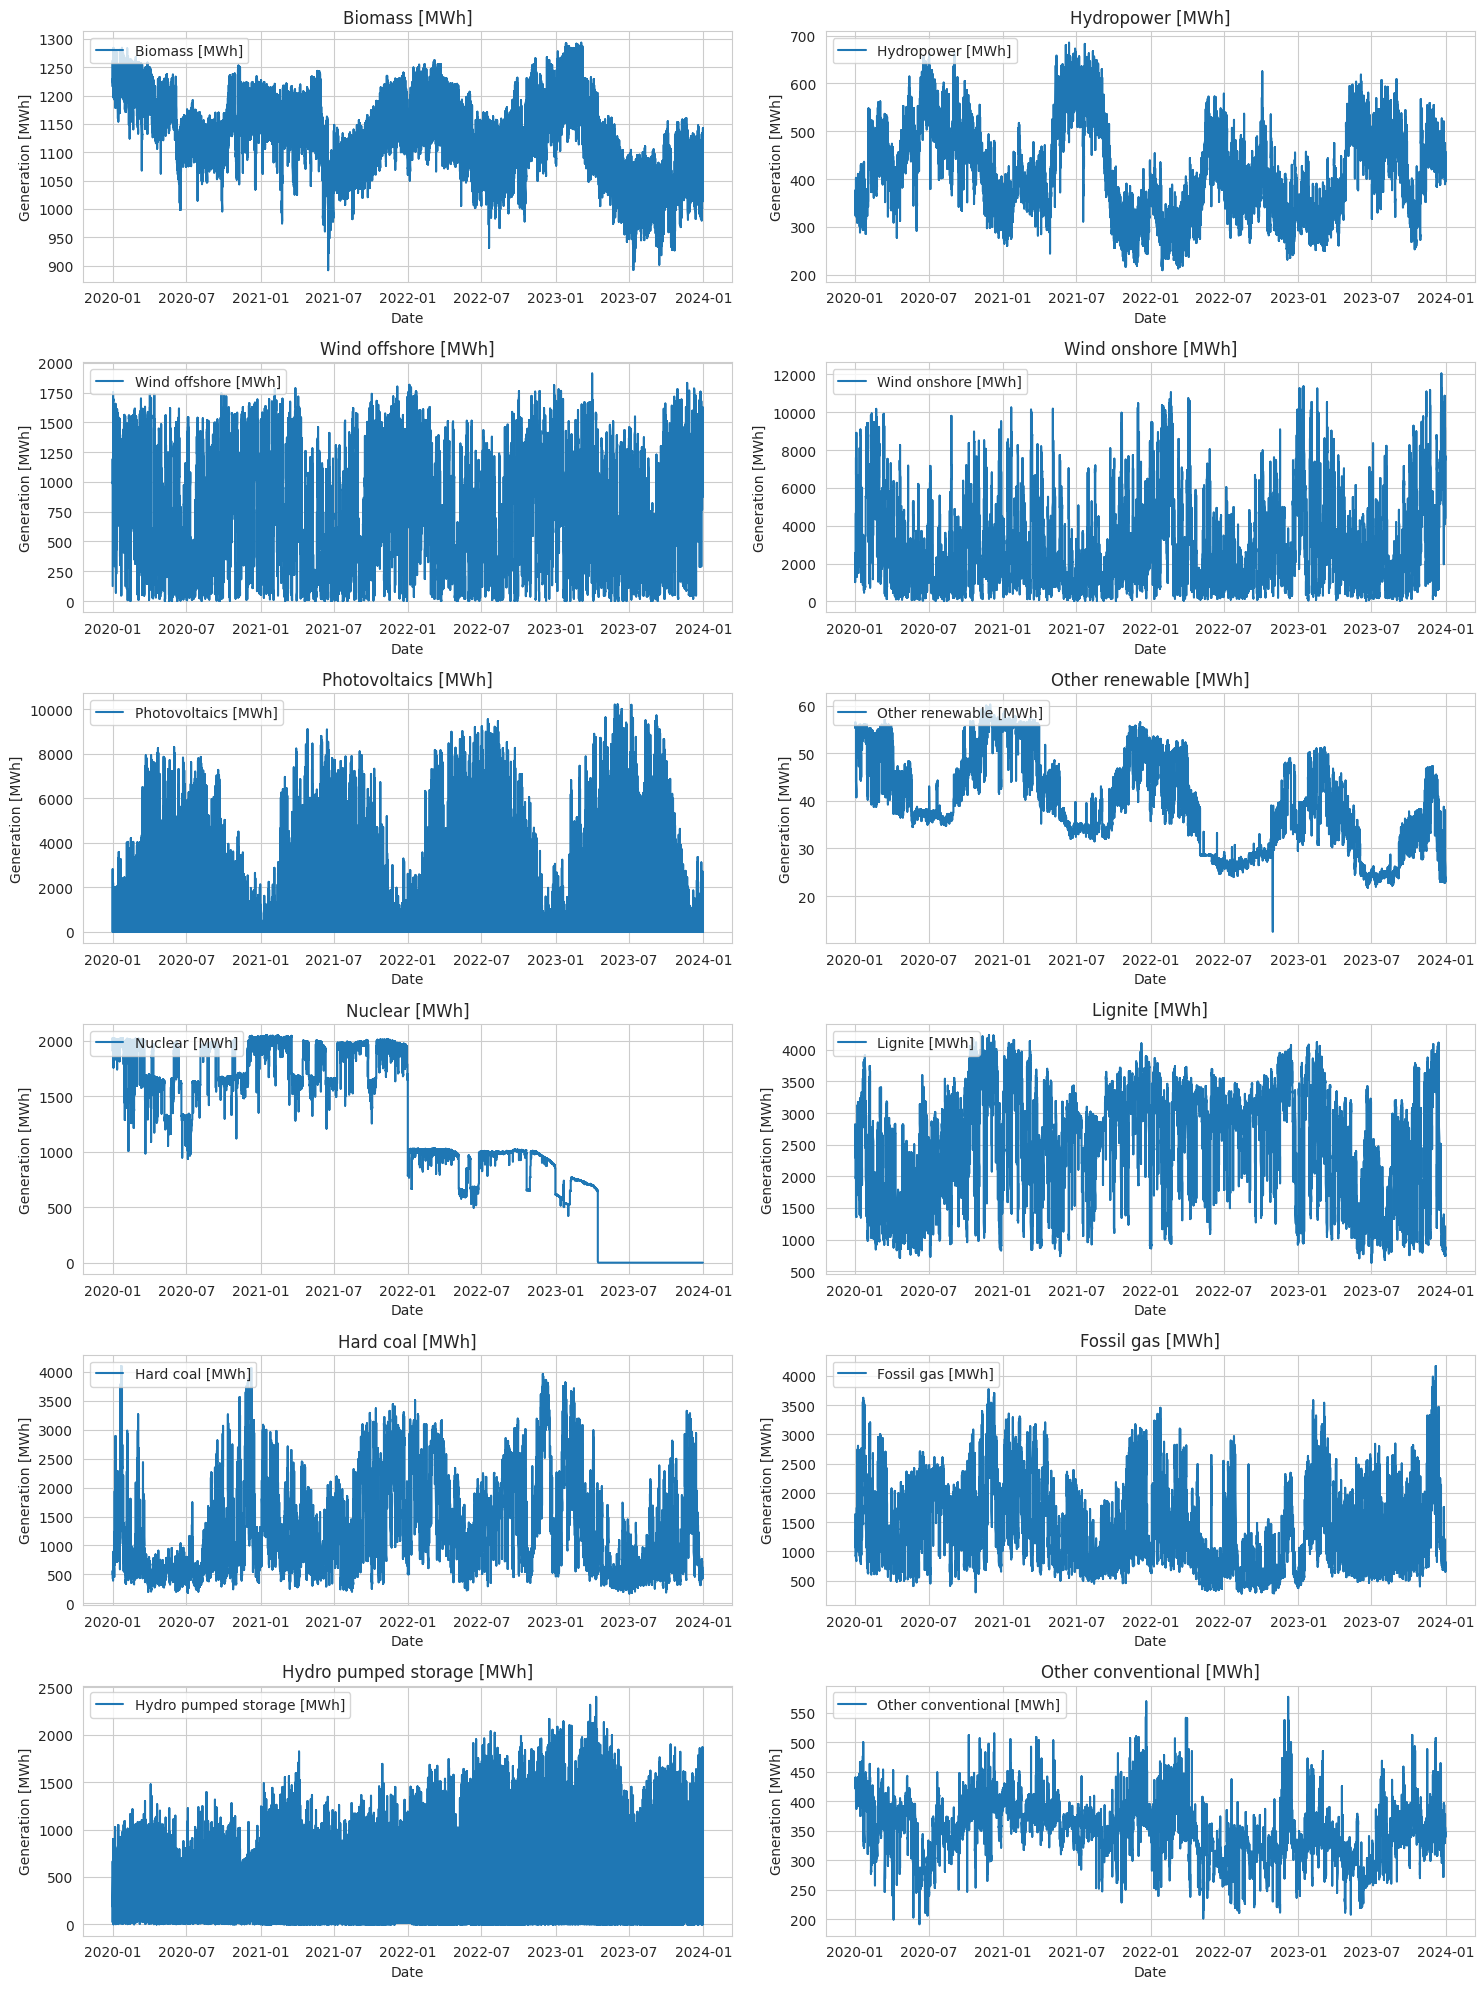

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Plotting time series for each energy generation category
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# Flattening axes array
axes = axes.flatten()

# Plotting each energy generation category
for i, col in enumerate(energy_columns):
    axes[i].plot(data_cleaned['Date'], data_cleaned[col], label=col, color='tab:blue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Generation [MWh]')
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()


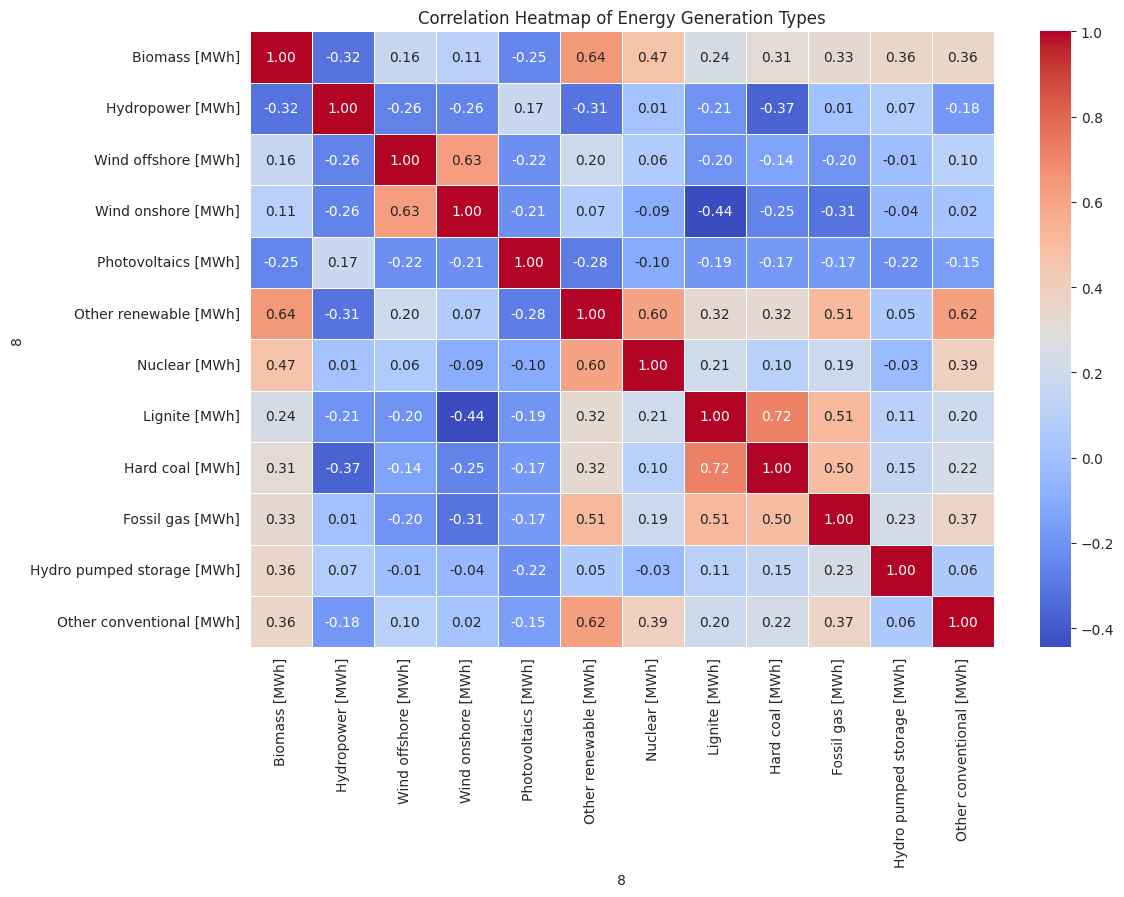

In [16]:
# Calculating the correlation matrix
corr_matrix = data_cleaned[energy_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Energy Generation Types')
plt.show()


/tmp/ipykernel_61985/604790704.py:7: FutureWarning: The provided callable <function mean at 0x7fdf60406950> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_onshore = data_cleaned.pivot_table(values='Wind onshore [MWh]', index='Hour', columns='DayOfWeek',
/tmp/ipykernel_61985/604790704.py:9: FutureWarning: The provided callable <function mean at 0x7fdf60406950> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_offshore = data_cleaned.pivot_table(values='Wind offshore [MWh]', index='Hour', columns='DayOfWeek',


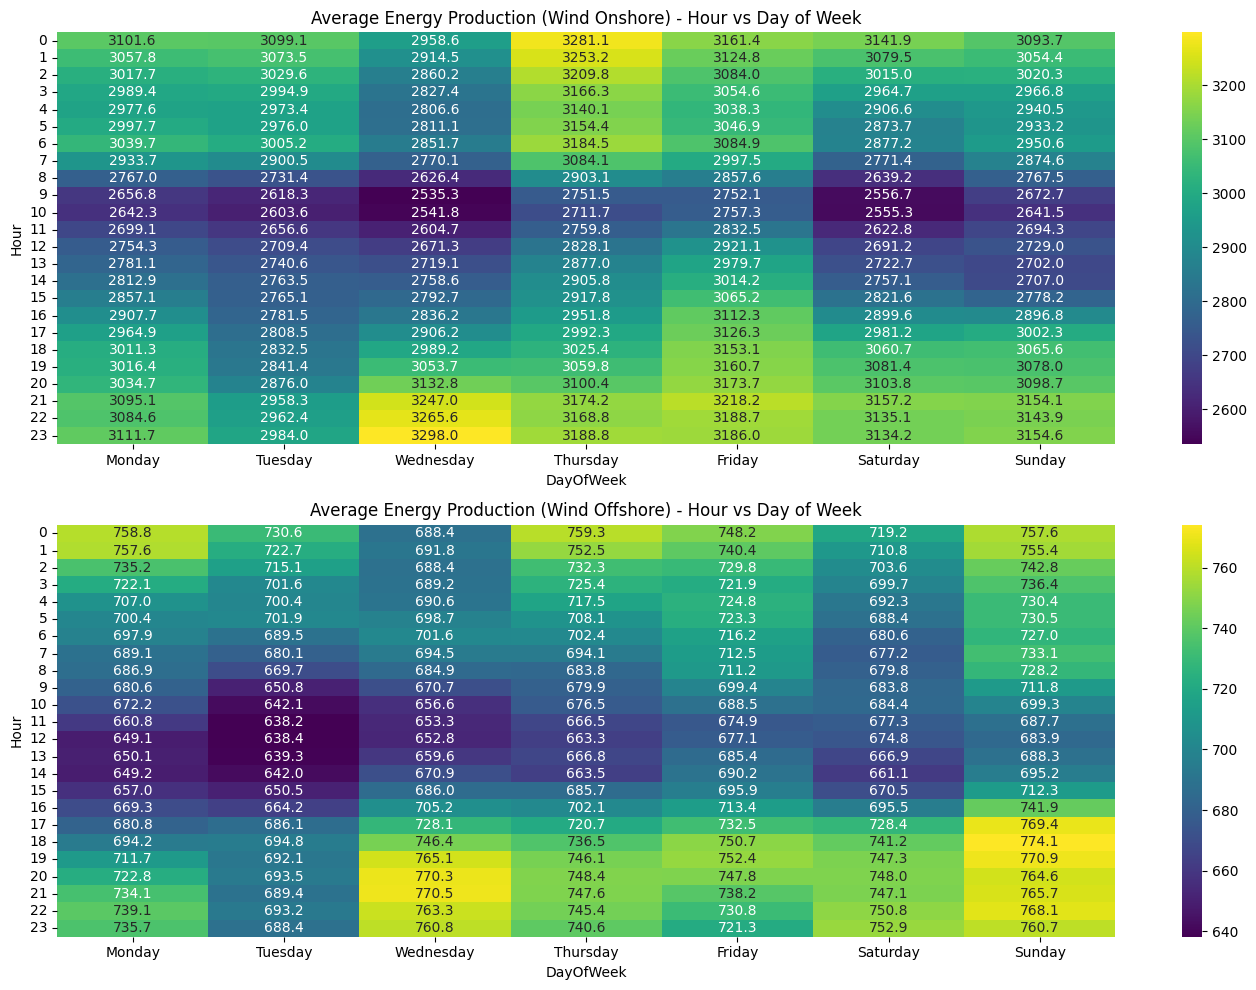

In [8]:

# Extracting the day of week and hour from the 'Start' column
data_cleaned['DayOfWeek'] = data_cleaned['Date'].dt.day_name()
data_cleaned['Hour'] = data_cleaned['Start'].apply(lambda x: x.hour)
data_cleaned['Month'] = data_cleaned['Date'].dt.month_name()

# Creating pivot tables for heatmap
pivot_onshore = data_cleaned.pivot_table(values='Wind onshore [MWh]', index='Hour', columns='DayOfWeek', 
                                        aggfunc=np.mean, dropna=True)
pivot_offshore = data_cleaned.pivot_table(values='Wind offshore [MWh]', index='Hour', columns='DayOfWeek', 
                                         aggfunc=np.mean, dropna=True)



# Ordering the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_onshore = pivot_onshore[day_order]
pivot_offshore = pivot_offshore[day_order]

# Plotting the heatmaps
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
sns.heatmap(pivot_onshore, cmap="viridis", annot=True, fmt=".1f")
plt.title('Average Energy Production (Wind Onshore) - Hour vs Day of Week')

plt.subplot(2, 1, 2)
sns.heatmap(pivot_offshore, cmap="viridis", annot=True, fmt=".1f")
plt.title('Average Energy Production (Wind Offshore) - Hour vs Day of Week')

plt.tight_layout()
plt.show()


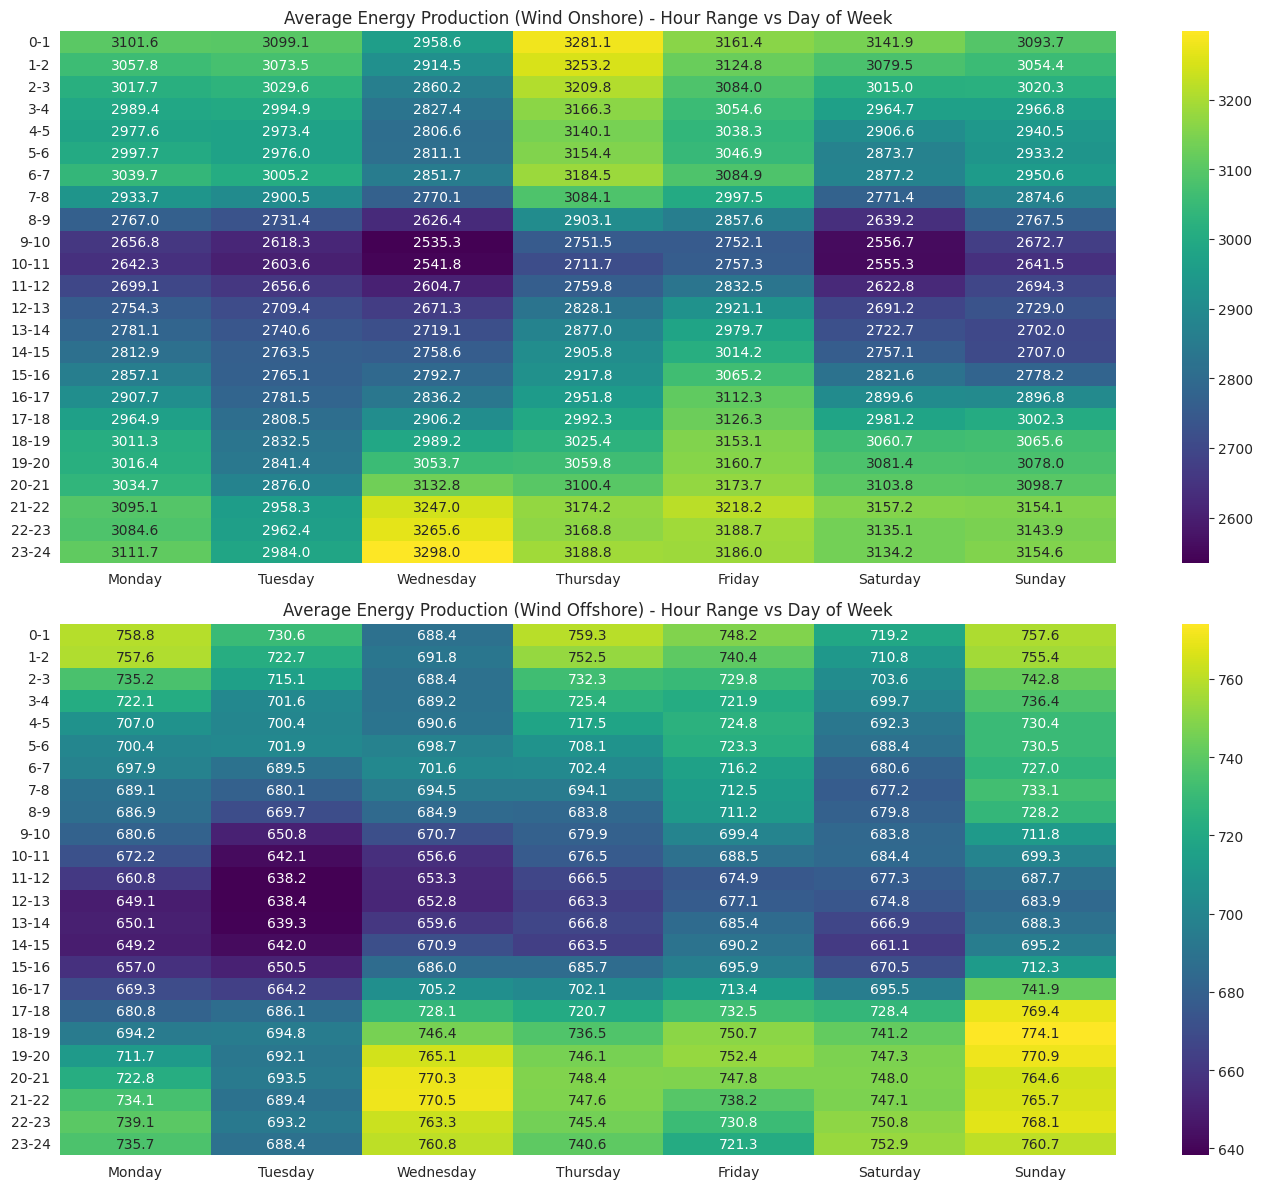

In [18]:
# Adjusting the heatmaps to display hour ranges (e.g., "1-2" for hours between 1 and 2)

# Creating hour ranges for the y-axis labels
hour_ranges = [f"{h}-{h+1}" for h in range(24)]

# Creating a new DataFrame with hour ranges as the index
pivot_onshore_hourly = pd.DataFrame(index=hour_ranges, columns=day_order)
pivot_offshore_hourly = pd.DataFrame(index=hour_ranges, columns=day_order)

# Populating the new DataFrames with average values from the pivot tables
for i, hour_range in enumerate(hour_ranges):
    pivot_onshore_hourly.loc[hour_range] = pivot_onshore.iloc[i]
    pivot_offshore_hourly.loc[hour_range] = pivot_offshore.iloc[i]

# Ensuring the data in the new pivot tables is numeric for proper visualization
pivot_onshore_hourly = pivot_onshore_hourly.apply(pd.to_numeric, errors='coerce')
pivot_offshore_hourly = pivot_offshore_hourly.apply(pd.to_numeric, errors='coerce')

# Replotting the heatmaps with numeric data and formatted hour ranges
plt.figure(figsize=(14, 12))

# Wind Onshore
plt.subplot(2, 1, 1)
sns.heatmap(pivot_onshore_hourly, cmap="viridis", annot=True, fmt=".1f")
plt.title('Average Energy Production (Wind Onshore) - Hour Range vs Day of Week')

# Wind Offshore
plt.subplot(2, 1, 2)
sns.heatmap(pivot_offshore_hourly, cmap="viridis", annot=True, fmt=".1f")
plt.title('Average Energy Production (Wind Offshore) - Hour Range vs Day of Week')

plt.tight_layout()
plt.show()


In [28]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        140256 non-null  datetime64[ns]
 1   Start                       140256 non-null  object        
 2   End                         140256 non-null  object        
 3   Biomass [MWh]               140256 non-null  float64       
 4   Hydropower [MWh]            140256 non-null  float64       
 5   Wind offshore [MWh]         140256 non-null  float64       
 6   Wind onshore [MWh]          140256 non-null  float64       
 7   Photovoltaics [MWh]         140256 non-null  float64       
 8   Other renewable [MWh]       140256 non-null  float64       
 9   Nuclear [MWh]               140256 non-null  float64       
 10  Lignite [MWh]               140256 non-null  float64       
 11  Hard coal [MWh]             140256 non-

In [5]:
# Feature engineering
data_cleaned['Hour'] = pd.to_datetime(data_cleaned['Start'], format='%H:%M:%S', errors='coerce').dt.hour
data_cleaned['DayOfWeek'] = data_cleaned['Date'].dt.dayofweek
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_for_model = data_cleaned.copy()

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Preparing all available variables as features except the target
X = data_for_model.drop(['Date', 'Start', 'End', 'Wind onshore [MWh]', 'Month', 'DayOfWeek'], axis=1)  # Exclude non-numeric and target variable
y = data_for_model['Wind onshore [MWh]']  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_full_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_full_model.fit(X_train, y_train)

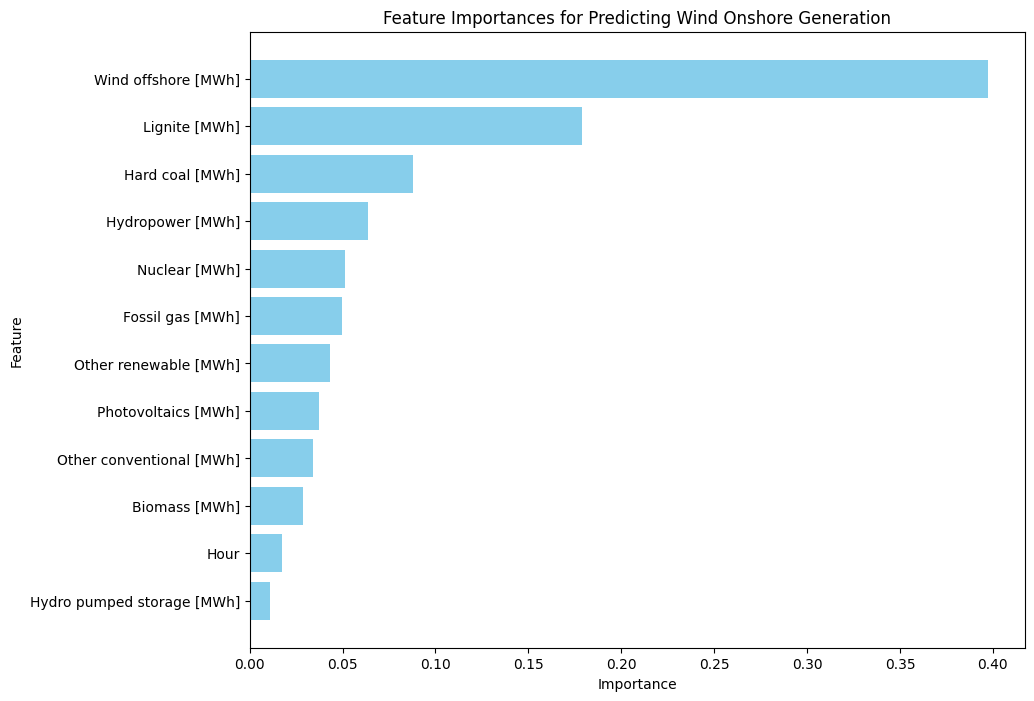

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
feature_importances_full = rf_full_model.feature_importances_

# Create a DataFrame for visualization
features_full = X_train.columns
importance_df_full = pd.DataFrame({'Feature': features_full, 'Importance': feature_importances_full}).sort_values(by='Importance', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(importance_df_full['Feature'], importance_df_full['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Predicting Wind Onshore Generation')
plt.show()


In [9]:
# Rename feature names to make them compatible with XGBoost
data_cleaned.columns = data_cleaned.columns.str.replace('[\[\]]', '', regex=True).str.replace('<', '')

In [34]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Update the top_features list
top_features = ['Wind offshore MWh', 'Lignite MWh', 'Hard coal MWh', 'Hydropower MWh', 'Nuclear MWh']

# Selecting the top 5 features
X_top = data_cleaned[top_features]
y_top = data_cleaned['Wind onshore MWh']  # Corrected target variable name

# Splitting the dataset into training and testing sets 
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.2, random_state=42)


In [35]:

# XGBoost model setup and training with the top 5 features
model_top = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

model_top.fit(X_train_top, y_train_top)

# predicting
y_pred_top = model_top.predict(X_test_top)


In [36]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error

def evaluate_model(y_test, prediction):
  mae = mean_absolute_error(y_test, prediction)
  rmse = root_mean_squared_error(y_test, prediction)
  mape = mean_absolute_percentage_error(y_test, prediction)
  r2score = r2_score(y_test, prediction)
  print(f"MAE: {mae}")
  print(f"RMSE: {rmse}")
  print(f"MAPE: {mape}")
  print(f"RSquare: {r2score}")

  return mae, rmse, mape, r2score

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()

In [37]:
mae_top, rmse_top, mape_top, r2score_top = evaluate_model(y_test_top, y_pred_top)


MAE: 740.9895150312663
RMSE: 1012.2212907068522
MAPE: 0.5289846878098137
RSquare: 0.816958150510982


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.fft import fft
import matplotlib.pyplot as plt

# Load the dataset
data_cleaned = pd.read_csv('data_cleaned.csv', parse_dates=['Date'])
data_cleaned.columns = data_cleaned.columns.str.replace('[\[\]]', '', regex=True).str.replace('<', '')
data_cleaned = data_cleaned.drop(columns='Unnamed: 0', axis =1)

# Create a 'True_End_DateTime' that considers if the 'End' time is technically the next day
data_cleaned['True_End_DateTime'] = pd.to_datetime(data_cleaned['Date'].dt.date.astype(str) + ' ' + data_cleaned['End'].astype(str))

# Adjust for cases where 'End' time is past midnight, indicating the end is actually the next day
for i, row in data_cleaned.iterrows():
    if row['End'] < row['Start']:  # If the end time is earlier in the day than the start time, it's the next day
        data_cleaned.at[i, 'True_End_DateTime'] = data_cleaned.at[i, 'True_End_DateTime'] + pd.Timedelta(days=1)




In [12]:
data_cleaned.head()

,Date,Start,End,Biomass MWh,Hydropower MWh,Wind offshore MWh,Wind onshore MWh,Photovoltaics MWh,Other renewable MWh,Nuclear MWh,Lignite MWh,Hard coal MWh,Fossil gas MWh,Hydro pumped storage MWh,Other conventional MWh,Hour,DayOfWeek,Month,True_End_DateTime
0,2020-01-01,00:00:00,00:15:00,1229.50,343.50,125.25,1476.25,0.0,56.25,2024.00,2320.0,496.25,1269.25,266.25,437.75,0,2,1,2020-01-01 00:15:00
1,2020-01-01,00:15:00,00:30:00,1228.25,339.75,125.25,1471.50,0.0,55.50,2020.75,2326.0,487.00,1237.50,128.00,437.75,0,2,1,2020-01-01 00:30:00
2,2020-01-01,00:30:00,00:45:00,1224.75,338.50,135.00,1527.50,0.0,55.50,2020.50,2334.0,485.50,1214.25,103.00,438.75,0,2,1,2020-01-01 00:45:00
3,2020-01-01,00:45:00,01:00:00,1224.25,337.50,163.75,1559.50,0.0,55.50,2019.50,2337.0,493.00,1195.50,57.50,437.50,0,2,1,2020-01-01 01:00:00
4,2020-01-01,01:00:00,01:15:00,1224.00,343.75,222.50,1521.00,0.0,55.50,2022.75,2352.0,484.00,1146.75,162.50,434.25,1,2,1,2020-01-01 01:15:00


In [13]:
data_modified = data_cleaned[['True_End_DateTime', 'Wind onshore MWh']].set_index('True_End_DateTime')
data_modified.head()

,Wind onshore MWh
True_End_DateTime,
2020-01-01 00:15:00,1476.25
2020-01-01 00:30:00,1471.50
2020-01-01 00:45:00,1527.50
2020-01-01 01:00:00,1559.50
2020-01-01 01:15:00,1521.00


# Test if data is Stationary
A time series is considered stationary if its statistical properties, such as mean, variance, and autocorrelation, are constant over time. This is crucial because most time series forecasting methods assume or require the time series to be stationary

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adft = adfuller(data_modified,autolag="AIC")

In [16]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -1.706577e+01              Test Statistics
1  7.888597e-30                      p-value
2  7.300000e+01             No. of lags used
3  1.401820e+05  Number of observations used
4 -3.430397e+00          critical value (1%)
5 -2.861561e+00          critical value (5%)
6 -2.566781e+00         critical value (10%)


### ADF Test Results Summary

- **Test Statistics**: -17.06577. A highly negative value indicates strong evidence against the null hypothesis of a unit root (non-stationarity), suggesting the time series is stationary.

- **p-value**: 7.888597e-30. A value close to zero significantly rejects the null hypothesis, confirming stationarity.

- **No. of Lags Used**: 73. Indicates the number of lag observations included in the test, chosen based on criteria like the AIC.

- **Number of Observations Used**: 140,182. The total observations used in the analysis after accounting for lagged terms.

- **Critical Values**: -3.430397 (1%), -2.861561 (5%), -2.566781 (10%). The test statistic is significantly lower than all critical values, further supporting the conclusion that the series is stationary across common significance levels.


# Autocorrelation

Autocorrelation measures the linear relationship between lagged values of a time series. High autocorrelation indicates past values have a strong influence on future values. Here's a summary of the autocorrelation for 'Wind onshore MWh' at different lags:



In [17]:
autocorrelation_lag1 = data_modified['Wind onshore MWh'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = data_modified['Wind onshore MWh'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = data_modified['Wind onshore MWh'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = data_modified['Wind onshore MWh'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.999483055239332
Three Month Lag:  0.9963342526322376
Six Month Lag:  0.9873327082715848
Nine Month Lag:  0.9745713879425354



These autocorrelation figures suggest 'Wind onshore MWh' exhibits strong temporal dependencies, with its past values being highly indicative of its future values. This characteristic is crucial for forecasting, as it implies that models leveraging past data (like ARIMA or XGBoost with lag features) could be effective for prediction.

# Seasonal Decompose

The purpose of seasonal decomposition is to decompose a time series into several components, each representing underlying patterns in the data.

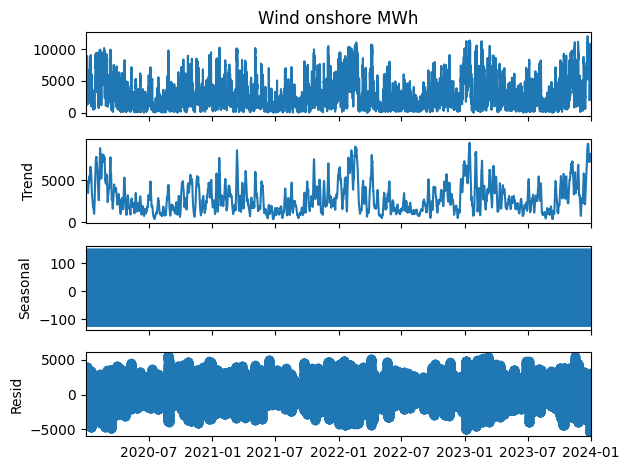

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition with yearly period (365 days)
decompose = seasonal_decompose(data_modified['Wind onshore MWh'],model='additive', period=365)
decompose.plot()
plt.show()

### Seasonal Decomposition of 'Wind onshore MWh'

**Original Data**: Shows actual 'Wind onshore MWh' values, with regular fluctuations suggesting seasonal patterns and variations indicative of underlying trends.

**Trend Component**: Indicates long-term changes in wind power production. Periods of increase or decrease in the trend may reflect changes in capacity, climatic variations, or other factor.

**Seasonal Component**: Reveals a stable, repeating yearly pattern in wind energy generation, likely due to predictable seasonal weather changes. 

**Residual Component**: Represents the noise after removing trend and seasonal factors. Ideally, residuals should resemble white noise—random variations with a mean of zero—indicating that the model has captured the primary patterns in the data. The small and stable residuals here suggest an effective model fit, with occasional spikes pointing to unexplained anomalies or events.


# Forecasting

In [18]:
# Before building and training our model, let's split the data into training and testing
df_train, df_test = data_modified[data_modified.index < '2023-01-01'], data_modified[data_modified.index >= '2023-01-01']

print('Train:\t', len(df_train))
print('Test:\t', len(df_test))

Train:	 105215
Test:	 35041


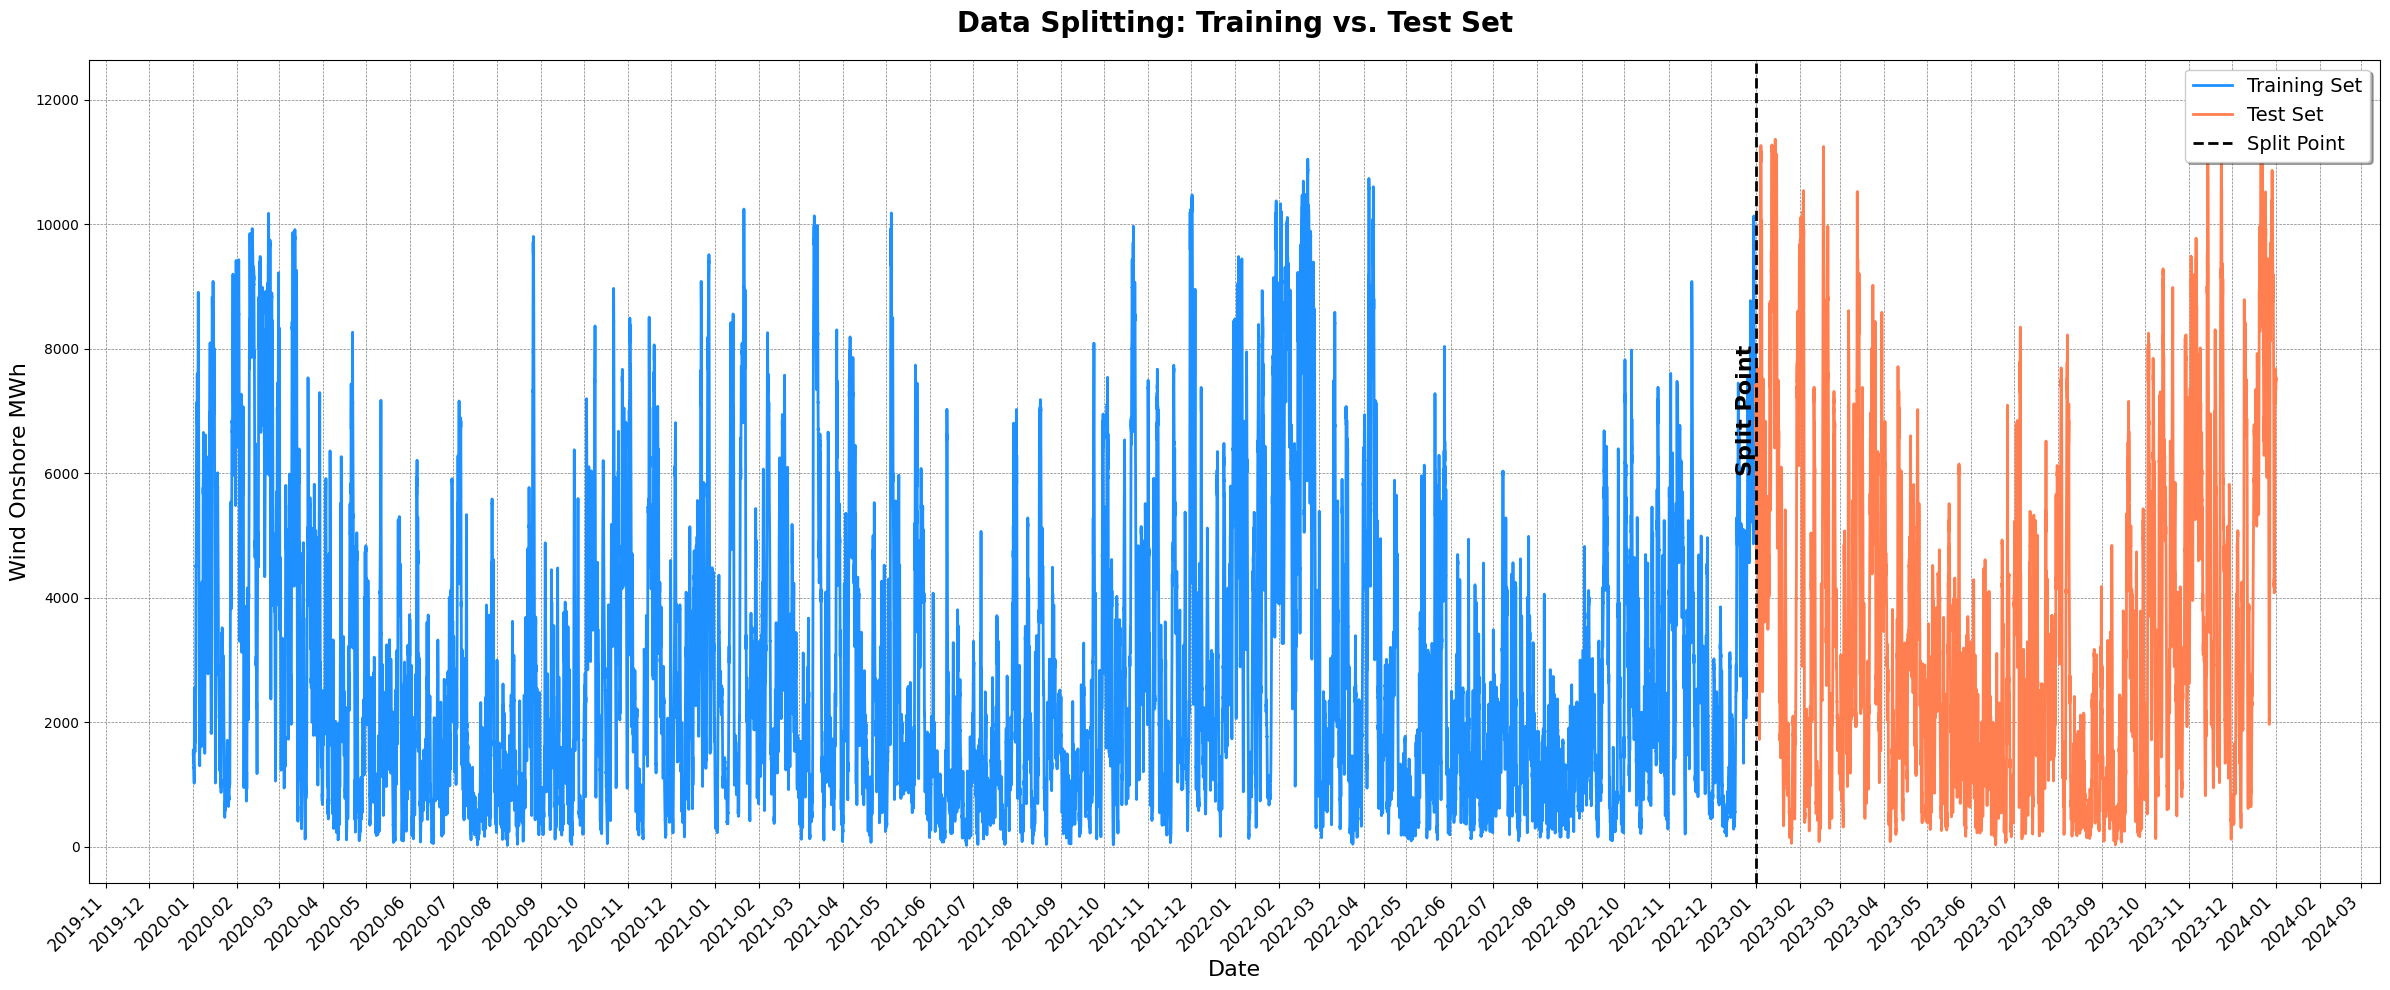

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))

# Plotting training and test sets
df_train['Wind onshore MWh'].plot(color='dodgerblue', label='Training Set', linewidth=2)
df_test['Wind onshore MWh'].plot(color='coral', label='Test Set', linewidth=2)

# Adding a vertical line to indicate the split point
plt.axvline('2023-01-01', color='black', ls='--', lw=2, label='Split Point')

# Adding text to indicate the split
plt.text('2023-01-01', max(df_train['Wind onshore MWh'].max(), df_test['Wind onshore MWh'].max()) * 0.50, 'Split Point',
         fontsize=16, fontweight='bold', horizontalalignment='right', color='black', rotation=90)

# Adding titles, labels, and legend
plt.title('Data Splitting: Training vs. Test Set', weight='bold', fontsize=20, pad=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Wind Onshore MWh', fontsize=16)
plt.legend(loc='upper right', fontsize=14, frameon=True, shadow=True, fancybox=True)

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')

# Adjusting x-axis date format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45, ha="right", fontsize=12)

plt.tight_layout()
plt.show()


# Methodd : XGBoost 

In [20]:
def date_transform(data):
    df = data.copy()
    
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['Weekofyear'] = df.index.isocalendar().week

    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    
    X = df.drop('Wind onshore MWh', axis=1)
    y = df['Wind onshore MWh']
    
    return X, y

In [21]:
X_train, y_train = date_transform(df_train)
X_test, y_test = date_transform(df_test)

In [22]:
# Initialize the XGBRegressor with the 'eval_metric' parameter
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, eval_metric='mae', early_stopping_rounds =10)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

# xgb_model.save_model('xgboost_model.bin')
# Make predictions
xgb_pred = xgb_model.predict(X_test)


In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score, root_mean_squared_error

def evaluate_model(y_test, prediction):
  mae = mean_absolute_error(y_test, prediction)
  rmse = root_mean_squared_error(y_test, prediction)
  mape = mean_absolute_percentage_error(y_test, prediction)
  r2score = r2_score(y_test, prediction)
  print(f"MAE: {mae}")
  print(f"RMSE: {rmse}")
  print(f"MAPE: {mape}")
  print(f"RSquare: {r2score}")

  return mae, rmse, mape, r2score
mae, rmse, mape, r2score = evaluate_model(y_test, xgb_pred)


MAE: 1986.8302677535892
RMSE: 2553.1088420219035
MAPE: 1.4577114369189332
RSquare: 0.055800872932153855


In [24]:
# Calculate the range of your target variable
max_value = y_train.max()
min_value = y_train.min()
print(f"Range of Wind onshore MWh: {min_value} to {max_value}")

# Calculate a naive baseline MAE (using the mean of the training set)
baseline_predictions = [y_train.mean()] * len(y_test)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
print(f"Baseline MAE: {baseline_mae}")

# Assess the MAE in the context of the average production
average_production = y_train.mean()
print(f"Average Wind onshore MWh production: {average_production}")


Range of Wind onshore MWh: 22.75 to 11045.0
Baseline MAE: 2093.181496966664
Average Wind onshore MWh production: 2785.4900133060873


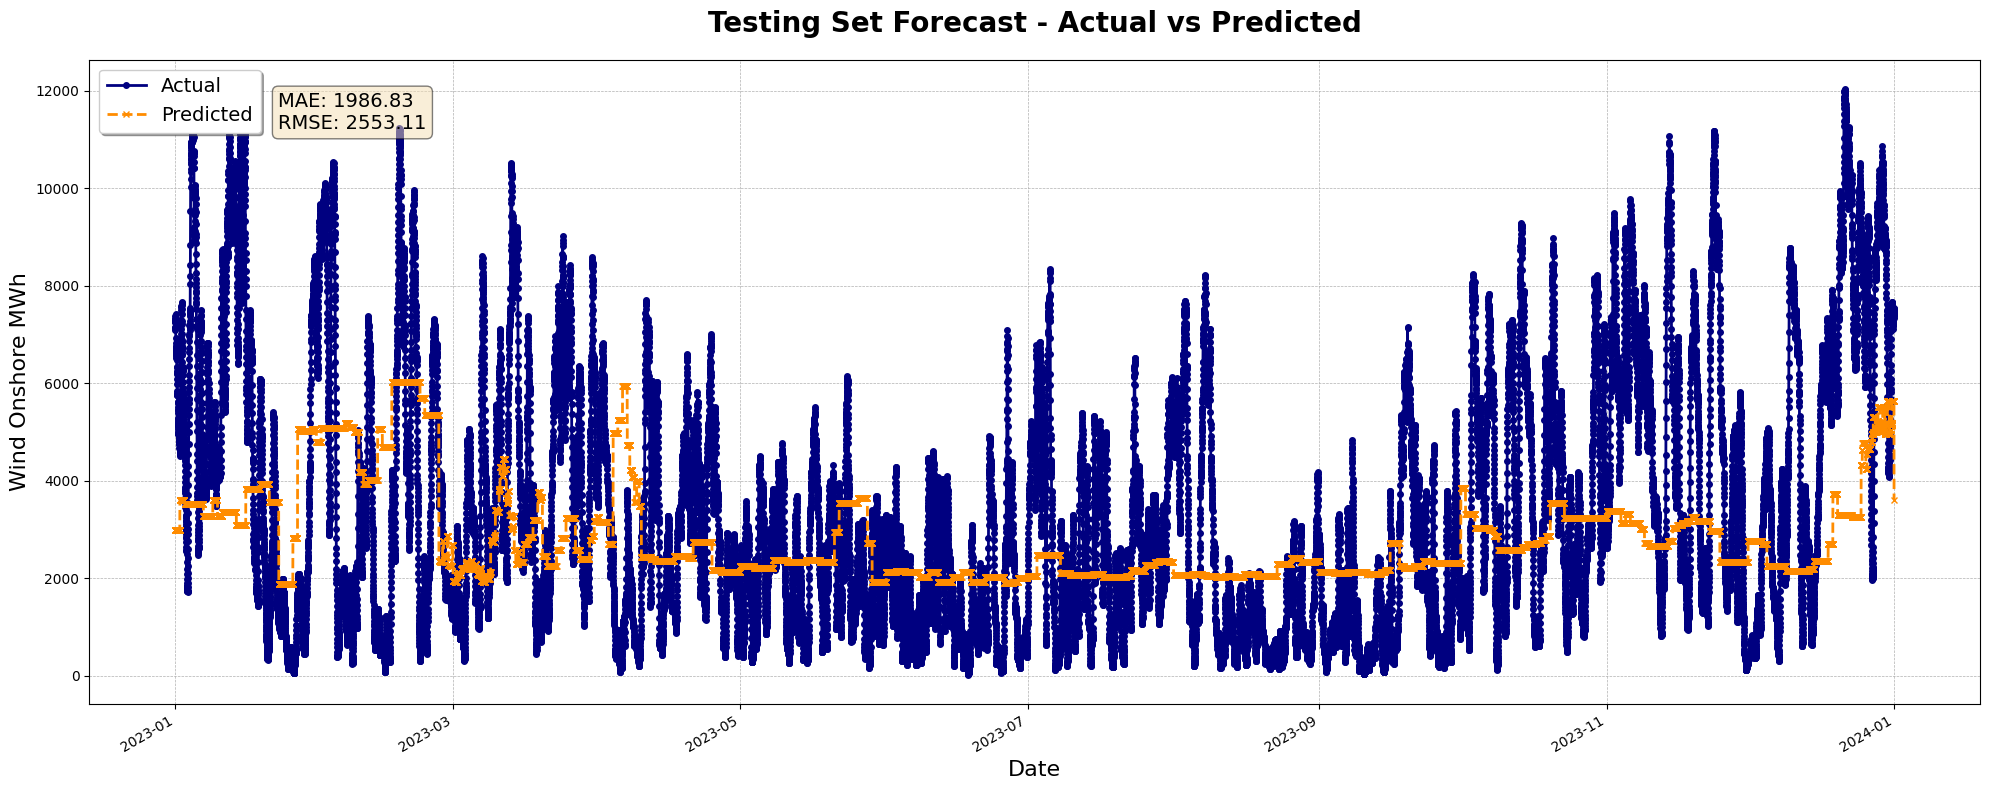

In [25]:
# Creating a new DataFrame for plotting
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_pred}, index=y_test.index)

# Creating the figure and axes for the plot
fig, ax = plt.subplots(figsize=(20, 8))

# Plotting both actual and predicted values
df_plot['Actual'].plot(ax=ax, label='Actual', color='navy', linewidth=2, marker='o', markersize=4)
df_plot['Predicted'].plot(ax=ax, label='Predicted', color='darkorange', linewidth=2, linestyle='--', marker='x', markersize=4)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding titles and labels
ax.set_title('Testing Set Forecast - Actual vs Predicted', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Wind Onshore MWh', fontsize=16)

# Adding legend
ax.legend(loc='upper left', fontsize=14, frameon=True, shadow=True, fancybox=True)

# Displaying MAE and RMSE directly on the plot
textstr = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Place the text box in upper left in axes coords
ax.text(0.10, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Aggregate the data to hourly for the last 7 days
last_7_days_hourly = data_modified.resample('H').sum()[-24*7:]

# Generate future timestamps for the next 7 days, hourly
future_dates_hourly = pd.date_range(start=last_7_days_hourly.index[-1] + pd.Timedelta(hours=1), periods=24*7, freq='H')

# Combine training and testing data
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

# Initialize and fit the model
xgb_model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model2.fit(X, y, eval_metric='mae')

# Prepare the future data DataFrame for prediction
future_data_df = pd.DataFrame(index=future_dates_hourly)
future_data_df['Hour'] = future_dates_hourly.hour
future_data_df['Dayofweek'] = future_dates_hourly.dayofweek
future_data_df['Dayofmonth'] = future_dates_hourly.day
future_data_df['Dayofyear'] = future_dates_hourly.dayofyear
future_data_df['Weekofyear'] = future_dates_hourly.isocalendar().week
future_data_df['Month'] = future_dates_hourly.month
future_data_df['Quarter'] = future_dates_hourly.quarter
future_data_df['Year'] = future_dates_hourly.year

# Predict the wind onshore MWh production for the next 7 days, hourly
predicted_next_7_days = xgb_model2.predict(future_data_df)
predicted_next_7_days = pd.DataFrame(predicted_next_7_days, index=future_dates_hourly, columns=['Predicted Wind onshore MWh'])


/tmp/ipykernel_95922/3625346152.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  last_7_days_hourly = data_modified.resample('H').sum()[-24*7:]
/tmp/ipykernel_95922/3625346152.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates_hourly = pd.date_range(start=last_7_days_hourly.index[-1] + pd.Timedelta(hours=1), periods=24*7, freq='H')
/home/valmy/Workspace/GML/.venv/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


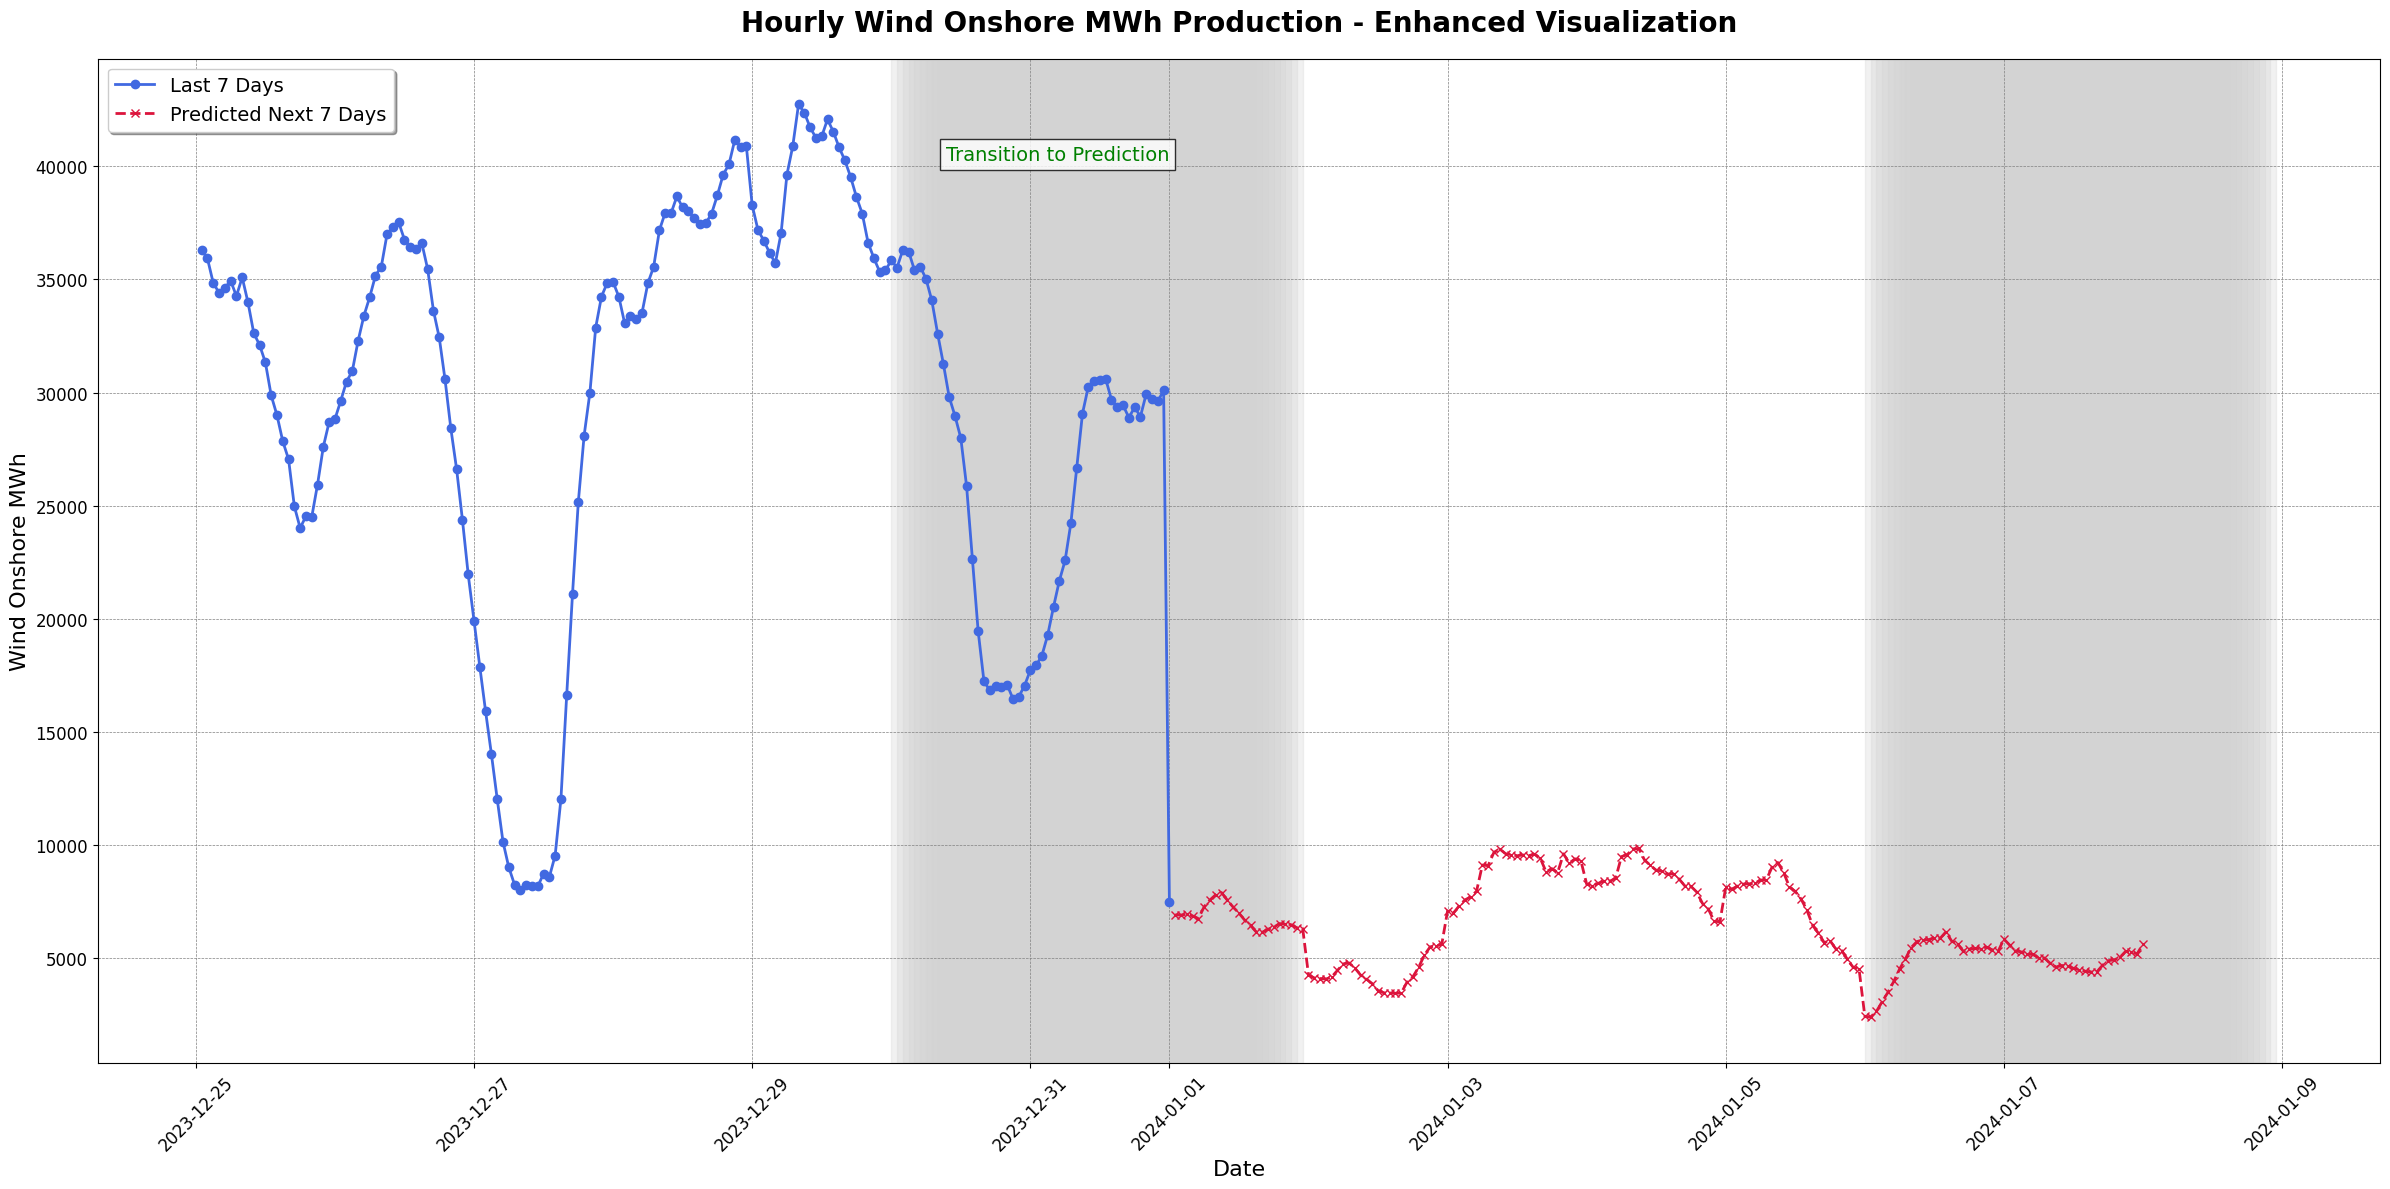

In [27]:
# Generate tick positions and labels for the plot
all_dates = last_7_days_hourly.index.union(predicted_next_7_days.index)
tick_positions = [date for date in all_dates if date.hour == 0]  # Every day at midnight

# Ensure the first tick is the start of the actual data and the last tick is the end of the predicted data
tick_positions = [last_7_days_hourly.index[0]] + tick_positions + [predicted_next_7_days.index[-1]]

tick_labels = [tick_positions[0].strftime('%b %d, %Y')] + \
              [date.strftime('%b %d') for date in tick_positions[1:-1]] + \
              [tick_positions[-1].strftime('%b %d, %Y')]


# Highlighting the transition from actual to predicted
transition_point = last_7_days_hourly.index[-1]

# Recreate the figure and axis objects for a clean start
fig, ax = plt.subplots(figsize=(24, 12))

# Plot actual last 7 days
ax.plot(last_7_days_hourly.index, last_7_days_hourly['Wind onshore MWh'], 
        label='Last 7 Days', marker='o', linestyle='-', color='royalblue', linewidth=2)

# Plot predicted next 7 days
ax.plot(predicted_next_7_days.index, predicted_next_7_days['Predicted Wind onshore MWh'], 
        label='Predicted Next 7 Days', marker='x', linestyle='--', color='crimson', linewidth=2)

# Customizing the plot with titles, labels, and legend
ax.set_title('Hourly Wind Onshore MWh Production - Enhanced Visualization', fontsize=20, fontweight='bold', pad=20)
ax.set_ylabel('Wind Onshore MWh', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.legend(loc='upper left', fontsize=14, frameon=True, shadow=True, fancybox=True)

# Enhancing tick marks for better readability
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adding a grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Highlight weekends with a background color
for day in all_dates:
    if day.weekday() >= 5:  # 5 and 6 correspond to Saturday and Sunday
        ax.axvspan(day, day + pd.Timedelta(days=1), color='lightgrey', alpha=0.3)

# Highlight the transition from actual to predicted with a text annotation
ax.text(transition_point, ax.get_ylim()[1]*0.9, 'Transition to Prediction', 
        horizontalalignment='right', color='green', fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



In [81]:
# xgb_model2.save_model('xgboost_model2.bin')

/home/valmy/Workspace/GML/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:07:29] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
